In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

1 & 2. Load dataset

In [8]:
df = pd.read_csv("airline-passengers.csv", on_bad_lines='skip', engine = "python")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

3. Explore

In [9]:
print(df.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


4. Plot series

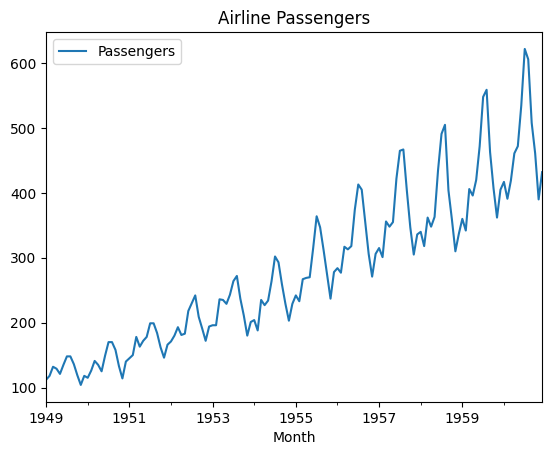

In [10]:
df.plot(title="Airline Passengers")
plt.show()

5. ADF Test

In [11]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")
adf_test(df['Passengers'])

ADF Statistic: 0.8154, p-value: 0.9919


6. Differencing if non-stationary

In [12]:
df_diff = df['Passengers'].diff().dropna()
adf_test(df_diff)

ADF Statistic: -2.8293, p-value: 0.0542


7. Re-run ADF already shown above

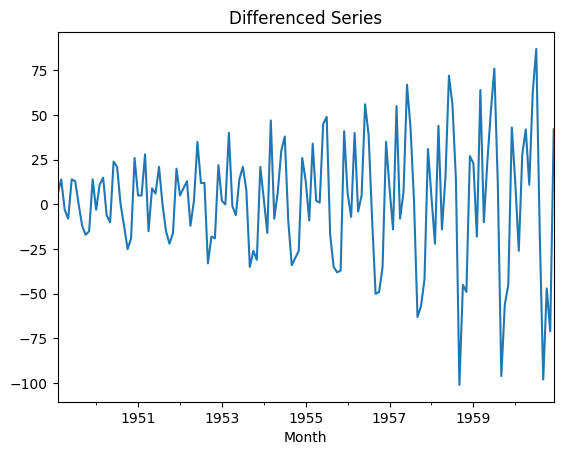

In [13]:
df_diff.plot(title="Differenced Series")
plt.show()

8. (If still non-stationary, difference again)
Skipped here since first difference usually works.

9. Train-test split

In [14]:
train_size = int(len(df) * 0.8)
train, test = df['Passengers'][:train_size], df['Passengers'][train_size:]

10. Fit ARIMA model

In [15]:
model = ARIMA(train, order=(5,1,0))  # (p,d,q) with d=1 from differencing
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -524.549
Date:                Tue, 23 Sep 2025   AIC                           1061.098
Time:                        05:20:12   BIC                           1077.515
Sample:                    01-01-1949   HQIC                          1067.760
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3558      0.092      3.854      0.000       0.175       0.537
ar.L2         -0.2644      0.109     -2.422      0.015      -0.478      -0.050
ar.L3          0.0847      0.078      1.089      0.2

11. Forecast

In [16]:
forecast = model_fit.forecast(steps=len(test))

12. Metrics

In [17]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = math.sqrt(mse)
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MSE: 6506.67, MAE: 67.38, RMSE: 80.66


13. Plot results

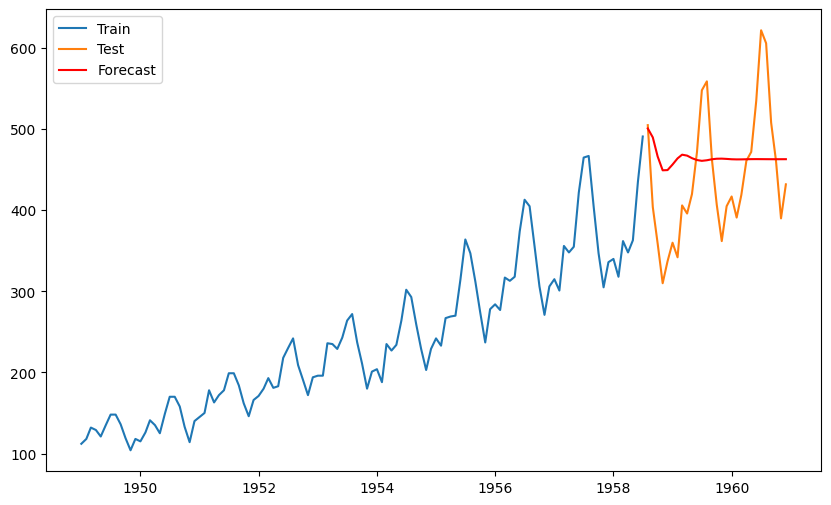

In [18]:
plt.figure(figsize=(10,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.legend()
plt.show()